# Generación de gráficos a partir de los resultados obtenidos
Este archivo contiene las funciones necesarias para crear los gráficos utilizados en la memoria a partir de los resultados obtenidos de los archivos de aprendizaje supervisado y aprendizaje one-class.

****Importación de las librerías****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

**Generación de los gráficos de barras representando el efecto de diferentes técnicas de encoding en los modelos one-class**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


✓ Guardado: graficos_metricas/accuracy.png


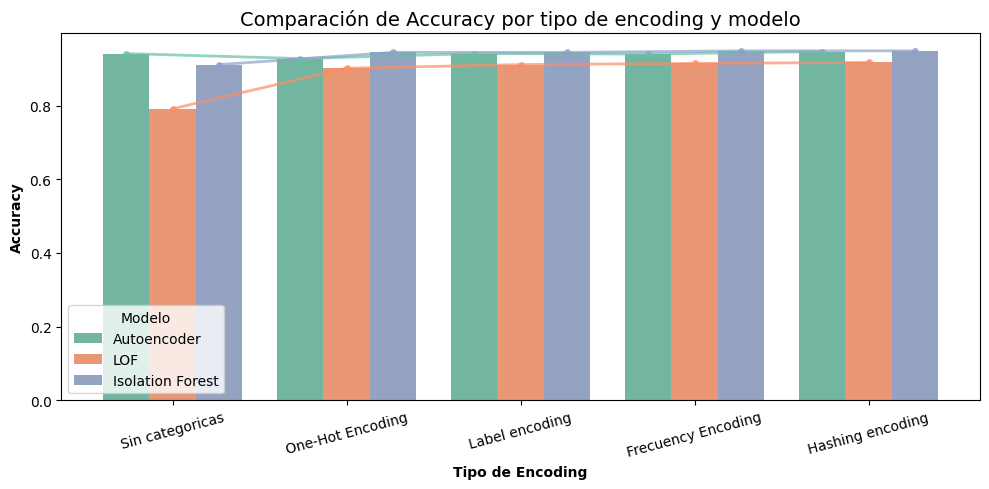

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


✓ Guardado: graficos_metricas/f1.png


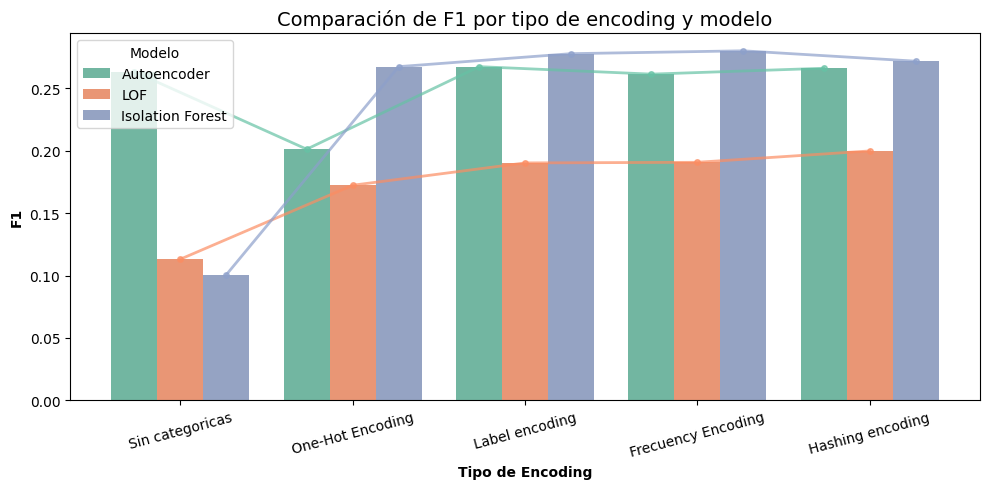

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


✓ Guardado: graficos_metricas/pr_auc.png


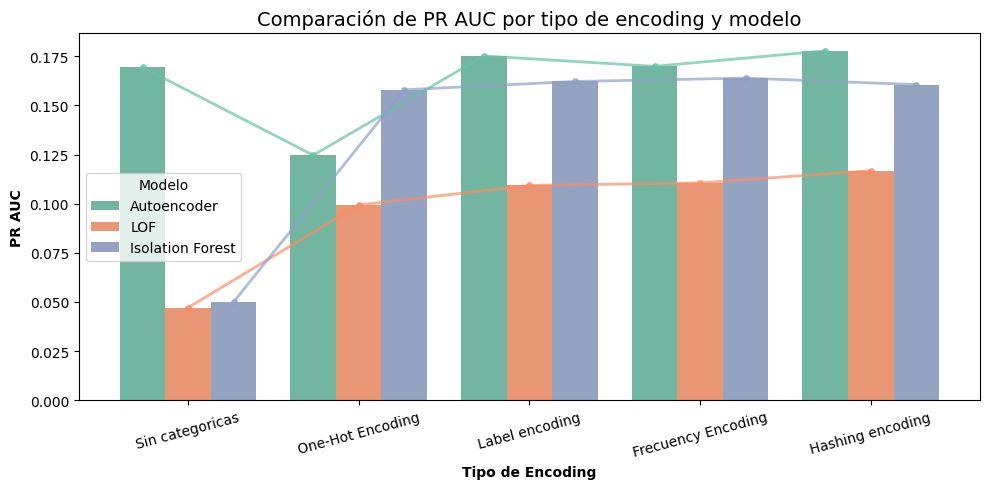

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


✓ Guardado: graficos_metricas/roc_auc.png


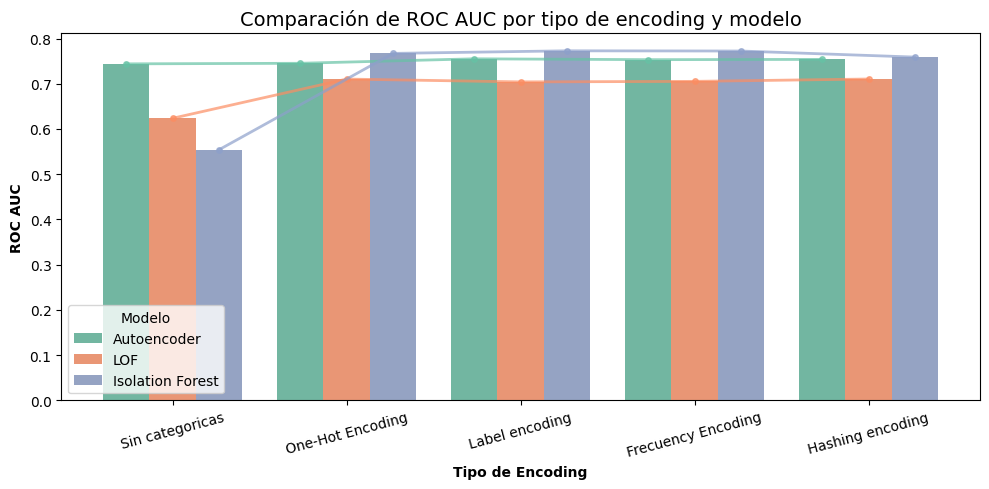

In [2]:
output_folder = "graficos_metricas"
os.makedirs(output_folder, exist_ok=True)

#Datos obtenidos tras realizar las pruebas en el archivo de aprendizaje one-class
data = [
    ["Autoencoder", "Sin categoricas", 0.9414, 0.26338, 0.16941, 0.74404],
    ["LOF", "Sin categoricas", 0.791546, 0.113112, 0.04712, 0.62370],
    ["Isolation Forest", "Sin categoricas", 0.91146, 0.10062, 0.0500, 0.55411],
    ["Autoencoder", "One-Hot Encoding", 0.9278, 0.2013, 0.1247, 0.7453],
    ["Isolation Forest", "One-Hot Encoding", 0.9447, 0.2675, 0.15798, 0.7672],
    ["LOF", "One-Hot Encoding", 0.9016, 0.1724, 0.0994, 0.7104],
    ["LOF", "Label encoding", 0.9114779, 0.1903, 0.1093, 0.7041],
    ["Isolation Forest", "Label encoding", 0.9447, 0.2779, 0.1622, 0.7729],
    ["Autoencoder", "Label encoding", 0.9413, 0.2675, 0.1752, 0.7552],
    ["Autoencoder", "Frecuency Encoding", 0.9401, 0.2615, 0.1699, 0.7533],
    ["Isolation Forest", "Frecuency Encoding", 0.9488, 0.2802, 0.1639, 0.7724],
    ["LOF", "Frecuency Encoding", 0.9147, 0.1908, 0.1106, 0.7053],
    ["Autoencoder", "Hashing encoding", 0.9468, 0.2662, 0.1778, 0.7539],
    ["Isolation Forest", "Hashing encoding", 0.9489, 0.27188, 0.1606, 0.7590],
    ["LOF", "Hashing encoding", 0.9173, 0.1999, 0.1168, 0.7105]
]

df = pd.DataFrame(data, columns=["Modelo", "Situacion", "Accuracy", "F1", "PR AUC", "ROC AUC"])

# Asegurar orden fijo de encoding
orden_situaciones = ["Sin categoricas", "One-Hot Encoding", "Label encoding", "Frecuency Encoding", "Hashing encoding"]
df["Situacion"] = pd.Categorical(df["Situacion"], categories=orden_situaciones, ordered=True)

#Configuración de los gráficos
metricas = ["Accuracy", "F1", "PR AUC", "ROC AUC"]
palette = sns.color_palette("Set2")  # Colores suaves pero bien diferenciables
modelos = df["Modelo"].unique()

for metrica in metricas:
    fig, ax = plt.subplots(figsize=(10,5))
    
    
    barplot = sns.barplot(
        data=df,
        x="Situacion",
        y=metrica,
        hue="Modelo",
        palette=palette,
        ax=ax
    )
    
    # Añadir líneas que conectan las barras del mismo modelo
    for idx_modelo, modelo in enumerate(modelos):
        datos_modelo = df[df["Modelo"] == modelo].sort_values("Situacion")
        
        x_positions = []
        y_values = []
        
       
        n_modelos = len(modelos)
        width = 0.8 / n_modelos  
        
        for idx_situacion, situacion in enumerate(orden_situaciones):
            valor = datos_modelo[datos_modelo["Situacion"] == situacion][metrica]
            if len(valor) > 0:
                x_pos = idx_situacion + (idx_modelo - n_modelos/2 + 0.5) * width
                x_positions.append(x_pos)
                y_values.append(valor.values[0])
        
        # Dibujar la linea
        if len(x_positions) > 1:
            ax.plot(x_positions, y_values, 
                   color=palette[idx_modelo], 
                   linewidth=2, 
                   alpha=0.7,
                   marker='o',
                   markersize=4)
    
    ax.set_title(f"Comparación de {metrica} por tipo de encoding y modelo", fontsize=14)
    ax.set_xlabel("Tipo de Encoding", fontweight="bold")
    ax.set_ylabel(metrica, fontweight="bold")
    plt.xticks(rotation=15)
    ax.legend(title="Modelo", loc='best')
    
    plt.tight_layout()
    
    # Guardar los gráficos
    filename = f"{metrica.replace(' ', '_').lower()}.png"
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath, dpi=300)
    print(f"✓ Guardado: {filepath}")
    plt.show()


**Generación de los heatmaps para ver el efecto de Label Encoding y Hashing Encoding en los modelos supervisados**

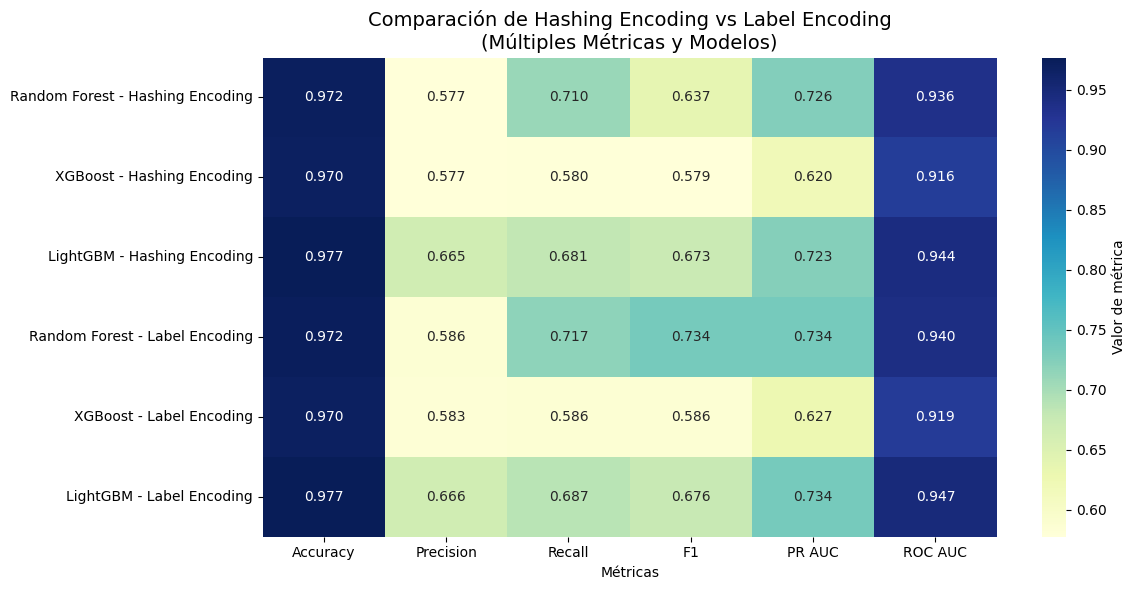

In [3]:
#Datos obtenidos tras realizar las pruebas en el archivo de aprendizaje one-class
data = [
    ["Random Forest", "Hashing Encoding", 0.9717, 0.5774, 0.7098, 0.6368, 0.72564, 0.9360],
    ["XGBoost",       "Hashing Encoding", 0.9704, 0.5774, 0.5802, 0.5788, 0.6195, 0.9157],
    ["LightGBM",      "Hashing Encoding", 0.9768, 0.6650, 0.6806, 0.6727, 0.7234, 0.9438],
    ["Random Forest", "Label Encoding",   0.9724, 0.5863, 0.7169, 0.7339, 0.7339, 0.9398],
    ["XGBoost",       "Label Encoding",   0.9701, 0.5831, 0.5860, 0.5860, 0.6270, 0.9190],
    ["LightGBM",      "Label Encoding",   0.9769, 0.6657, 0.6867, 0.6760, 0.7344, 0.9473]
]

df = pd.DataFrame(data, columns=[
    "Modelo", "Encoding", "Accuracy", "Precision", "Recall", "F1", "PR AUC", "ROC AUC"
])

# Combinamos modelo + encoding en una sola columna para el eje Y
df['Modelo_Encoding'] = df['Modelo'] + " - " + df['Encoding']

# Reorganizamos para el heatmap y configuramos
df_heat = df.set_index('Modelo_Encoding')[["Accuracy", "Precision", "Recall", "F1", "PR AUC", "ROC AUC"]]
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_heat,
    annot=True,          
    fmt=".3f",           
    cmap="YlGnBu",      
    cbar_kws={"label": "Valor de métrica"}
)

plt.title("Comparación de Hashing Encoding vs Label Encoding\n(Múltiples Métricas y Modelos)", fontsize=14)
plt.ylabel("")
plt.xlabel("Métricas")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Generación del gráfico para comparar los resultados según el numero de variables seleccionado en Mutual Information Classification**

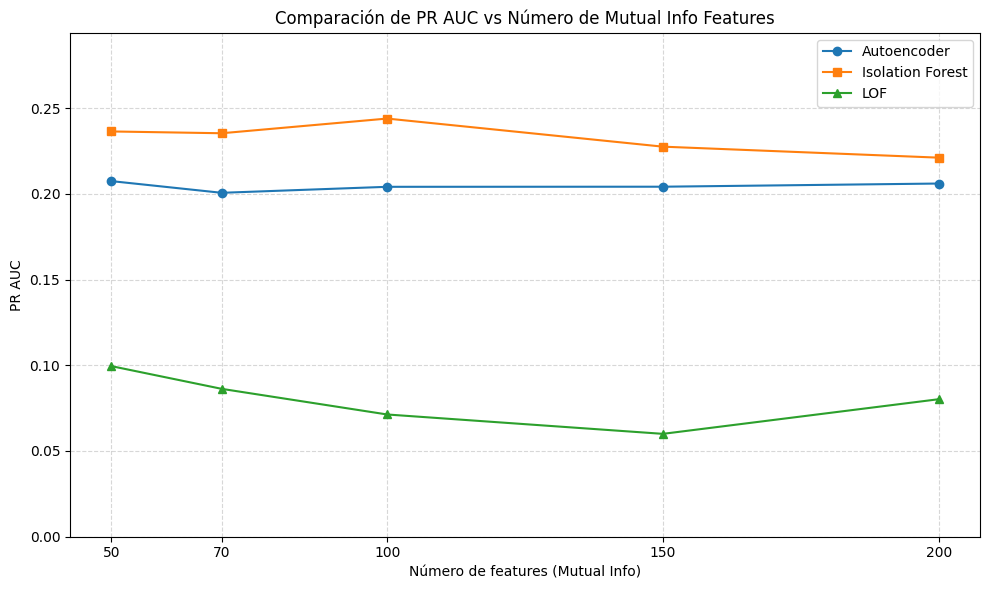

In [4]:
features = [50, 70, 100, 150,200]
autoencoder_pr = [0.207411, 0.20059, 0.20409, 0.20415,0.2060]
isolation_pr   = [0.23638, 0.23533, 0.2439, 0.22751,0.2211]
lof_pr         = [0.09950, 0.08625, 0.0713, 0.06,0.0802]

plt.figure(figsize=(10,6))
plt.plot(features, autoencoder_pr, marker='o', label='Autoencoder')
plt.plot(features, isolation_pr, marker='s', label='Isolation Forest')
plt.plot(features, lof_pr, marker='^', label='LOF')

plt.title('Comparación de PR AUC vs Número de Mutual Info Features')
plt.xlabel('Número de features (Mutual Info)')
plt.ylabel('PR AUC')
plt.xticks(features)
plt.ylim(0, max(isolation_pr)+0.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



**Gráfico para indicar los resultados en los algoritmos supervisados antes y después de SMOTE**

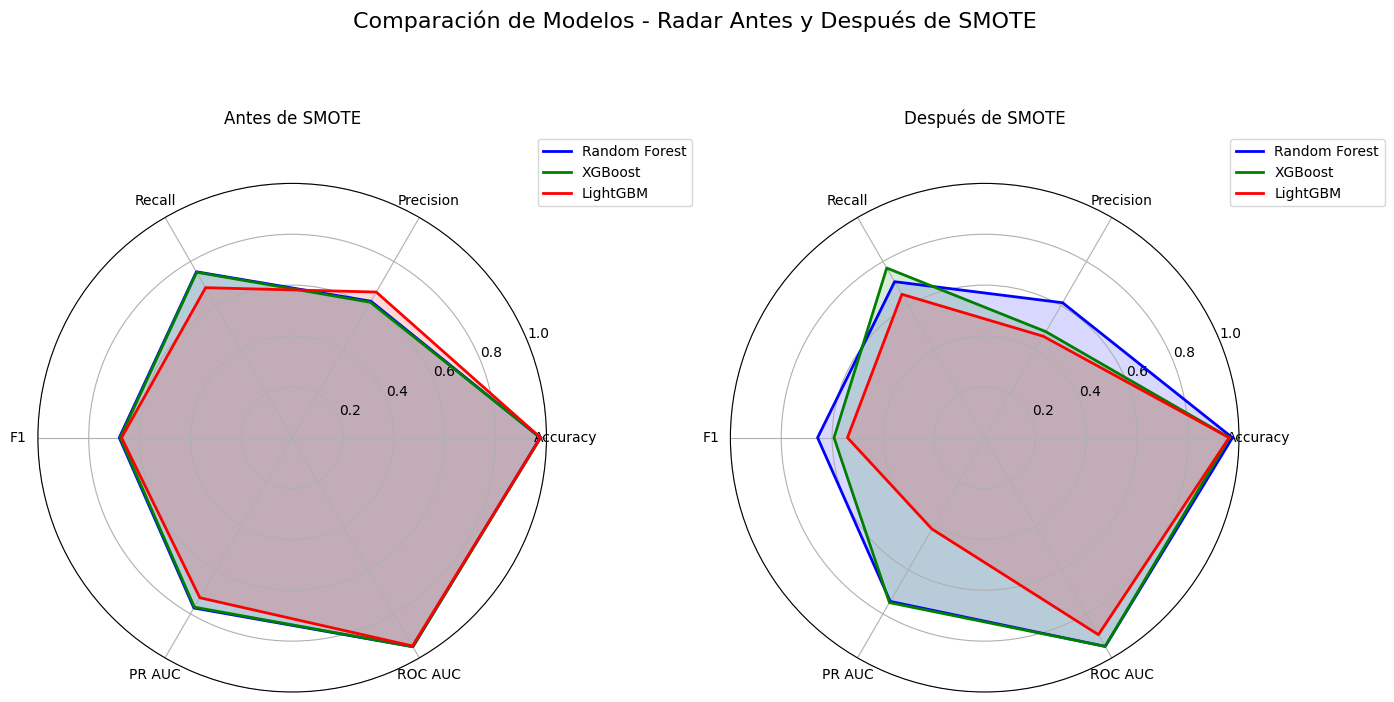

✅ Imagen exportada como 'radar_modelos_smote.png'


In [11]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'PR AUC', 'ROC AUC']
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Cerrar círculo

data = {
    'Random Forest': {
        'Antes SMOTE': [0.9752, 0.6195, 0.7534, 0.6799, 0.7732, 0.9492],
        'Después SMOTE': [0.9741, 0.6128, 0.7084, 0.6571, 0.7433, 0.9477]
    },
    'XGBoost': {
        'Antes SMOTE': [0.9766, 0.6149, 0.7513, 0.6763, 0.7694, 0.9490],
        'Después SMOTE': [0.9629, 0.4814, 0.7704, 0.5925, 0.7489, 0.9477]
    },
    'LightGBM': {
        'Antes SMOTE': [0.9766, 0.6613, 0.6811, 0.6710, 0.7266, 0.9457],
        'Después SMOTE': [0.9611, 0.4606, 0.6511, 0.5395, 0.4147, 0.8945]
    }
}

# Colores para cada modelo
colors = {
    'Random Forest': 'blue',
    'XGBoost': 'green',
    'LightGBM': 'red'
}

# Crear figura con 2 subplots
fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 7))
fig.suptitle('Comparación de Modelos - Radar Antes y Después de SMOTE', fontsize=16, y=1.05)

#Antes de SMOTE
ax = axs[0]
ax.set_title('Antes de SMOTE', y=1.1)
for model, values_dict in data.items():
    values = values_dict['Antes SMOTE'] + values_dict['Antes SMOTE'][:1]
    ax.plot(angles, values, label=model, color=colors[model], linewidth=2)
    ax.fill(angles, values, alpha=0.15, color=colors[model])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

#Después de SMOTE
ax = axs[1]
ax.set_title('Después de SMOTE', y=1.1)
for model, values_dict in data.items():
    values = values_dict['Después SMOTE'] + values_dict['Después SMOTE'][:1]
    ax.plot(angles, values, label=model, color=colors[model], linewidth=2)
    ax.fill(angles, values, alpha=0.15, color=colors[model])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()

# ---- Guardar imagen ----
plt.savefig('radar_modelos_smote.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✅ Imagen exportada como 'radar_modelos_smote.png'")


**Matrices de conf**

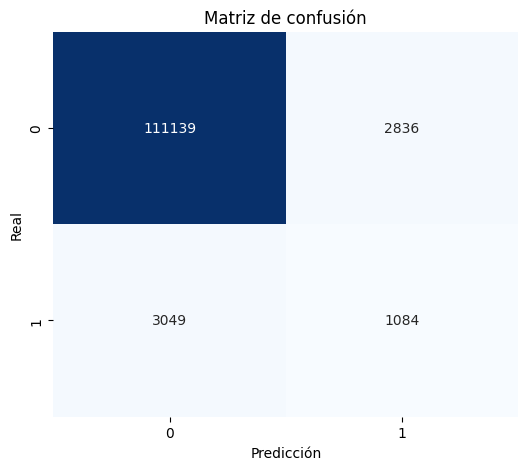

In [8]:
# Matriz de confusión Autoencoder
cm = np.array([[111139, 2836],
               [3049, 1084]])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

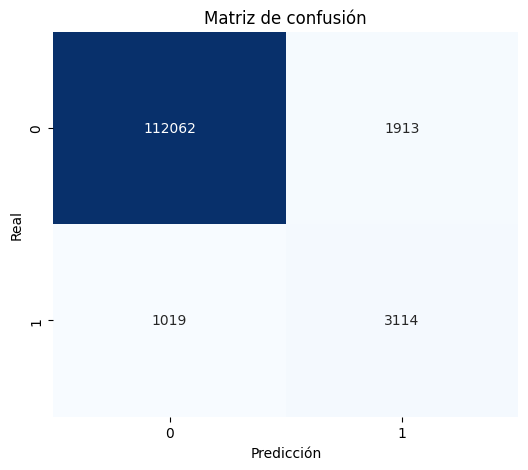

In [9]:
# Matriz de confusión Random Forest
cm = np.array([[112062, 1913],
               [1019, 3114]])

# Crear un heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.savefig("matriz_confusion_rf.png", dpi=300, bbox_inches='tight')

plt.show()
